# Step 1:- Read_Dataset

In [1]:
import pandas as pd
A = pd.read_csv("C:/Users/LENOVO/Desktop/ML/loan_pred/training_set.csv")

In [2]:
A.head(2)

Loan_ID Gender Married Dependents Education Self_Employed  \
0  LP001002   Male      No          0  Graduate            No   
1  LP001003   Male     Yes          1  Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0           5849.0                0.0         NaN             360.0   
1              NaN             1508.0       128.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N

# Step 2:- Missing_Data_Treatment

In [3]:
A.isna().sum()

Loan_ID               0
Gender               15
Married               3
Dependents           15
Education             1
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
from PM8wd import replacer
replacer(A)

In [5]:
A.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Step 3:- Preprocessing

In [6]:
Y = A[["Loan_Status"]]
X = A.drop(labels=["Loan_Status","Loan_ID"],axis = 1)

In [7]:
from PM8wd import standardize,outliers
X1 = standardize(X)
outliers = outliers(X1)

In [8]:
X = X.drop(index=outliers,axis=0)
Y = Y.drop(index=outliers,axis=0)
print(X.shape)
X.index = range(0,577,1)
Y.index = range(0,577,1)

(577, 11)


In [9]:
X.head(2)

Gender Married Dependents Education Self_Employed  ApplicantIncome  \
0   Male      No          0  Graduate            No       5849.00000   
1   Male     Yes          1  Graduate            No       5405.54085   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0  146.412162             360.0             1.0   
1             1508.0  128.000000             360.0             1.0   

  Property_Area  
0         Urban  
1         Rural

In [10]:
from PM8wd import preprocessing
Xnew = preprocessing(X)

In [11]:
from warnings import filterwarnings
filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Ynew = pd.DataFrame(le.fit_transform(Y),columns=["Loan_Status"])

In [12]:
Ynew

Loan_Status
0              1
1              0
2              1
3              1
4              1
..           ...
572            1
573            1
574            1
575            1
576            0

[577 rows x 1 columns]

# Step 4:- Train_the_Model

In [13]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

In [14]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(patience=7,monitor='val_accuracy')

nn = Sequential()
nn.add(Dense(40,input_dim=20))
nn.add(Dense(1,activation="sigmoid"))

nn.compile(loss="binary_crossentropy",metrics=["accuracy"])
model = nn.fit(Xnew,Ynew,validation_split=0.2,epochs=50,callbacks=es)

Epoch 1/50
15/15 [==============================] - 0s 9ms/step - loss: 0.6471 - accuracy: 0.6855 - val_loss: 0.6356 - val_accuracy: 0.6724
Epoch 2/50
15/15 [==============================] - 0s 2ms/step - loss: 0.5810 - accuracy: 0.7223 - val_loss: 0.5929 - val_accuracy: 0.6897
Epoch 3/50
15/15 [==============================] - 0s 1ms/step - loss: 0.5406 - accuracy: 0.7657 - val_loss: 0.5570 - val_accuracy: 0.7500
Epoch 4/50
15/15 [==============================] - 0s 2ms/step - loss: 0.5096 - accuracy: 0.7983 - val_loss: 0.5312 - val_accuracy: 0.7845
Epoch 5/50
15/15 [==============================] - 0s 1ms/step - loss: 0.4872 - accuracy: 0.8069 - val_loss: 0.5100 - val_accuracy: 0.8103
Epoch 6/50
15/15 [==============================] - 0s 2ms/step - loss: 0.4719 - accuracy: 0.8091 - val_loss: 0.5006 - val_accuracy: 0.8190
Epoch 7/50
15/15 [==============================] - 0s 2ms/step - loss: 0.4633 - accuracy: 0.8091 - val_loss: 0.4900 - val_accuracy: 0.8190
Epoch 8/50
15/15 [==

In [15]:
model.history

{'loss': [0.6470978856086731,
  0.5809938907623291,
  0.540615975856781,
  0.5095778703689575,
  0.4871668517589569,
  0.4719175696372986,
  0.4632773995399475,
  0.455661803483963,
  0.4498063325881958,
  0.44639742374420166,
  0.4438449442386627,
  0.4436028301715851,
  0.4423341155052185],
 'accuracy': [0.6854663491249084,
  0.7223427295684814,
  0.7657266855239868,
  0.7982646226882935,
  0.8069414496421814,
  0.8091106414794922,
  0.8091106414794922,
  0.8091106414794922,
  0.8091106414794922,
  0.8069414496421814,
  0.8091106414794922,
  0.8004338145256042,
  0.811279833316803],
 'val_loss': [0.6355709433555603,
  0.5929394364356995,
  0.557007908821106,
  0.5311951637268066,
  0.5100106000900269,
  0.5005564093589783,
  0.4899626672267914,
  0.4848458468914032,
  0.4808860123157501,
  0.47966575622558594,
  0.47978395223617554,
  0.4774109125137329,
  0.47896653413772583],
 'val_accuracy': [0.6724137663841248,
  0.6896551847457886,
  0.75,
  0.7844827771186829,
  0.8103448152542

In [16]:
acc = model.history['accuracy']

val_acc = model.history['val_accuracy']

len(acc)

13

In [17]:
Q = range(0,14,1)

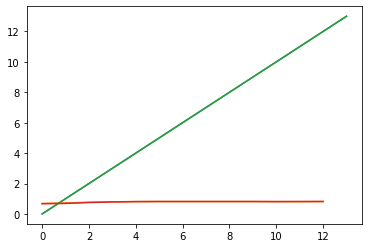

In [18]:
import matplotlib.pyplot as plt
plt.plot(range(0,14,1),Q,acc)
plt.plot(range(0,14,1),Q,val_acc)

# Step 5:- Creating Testing Data ready for prediction

In [19]:
B = pd.read_csv("C:/Users/LENOVO/Desktop/ML/loan_pred/testing_set.csv")
replacer(B)

In [20]:
Xnew.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [21]:
xtest = B.drop(labels=["Loan_ID"],axis=1)

In [22]:
xtest_new = preprocessing(xtest)

In [23]:
len(xtest_new.columns)

20

In [24]:
len(Xnew.columns)

20

# Step 6:- Final_Output

# Solution-1

In [25]:
pred_prob = nn.predict(xtest_new)

In [26]:
Q = []
for i in pred_prob:
    if(i[0] > 0.5):
        Q.append("Y")
    else:
        Q.append("N")

In [27]:
W = pd.DataFrame(B.Loan_ID)
W['Loan_Status'] = Q

In [28]:
W.head()

Loan_ID Loan_Status
0  LP001015           Y
1  LP001022           Y
2  LP001031           Y
3  LP001035           Y
4  LP001051           Y

# Solution-2

In [29]:
Q = []
for i in nn.predict_classes(xtest_new):
    Q.append(i[0])

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [30]:
pred = le.inverse_transform(Q)
W = pd.DataFrame(B.Loan_ID)
W['Loan_Status'] = pred

In [31]:
W.head()

Loan_ID Loan_Status
0  LP001015           Y
1  LP001022           Y
2  LP001031           Y
3  LP001035           Y
4  LP001051           Y

In [32]:
W = pd.DataFrame([B.Loan_ID,pred]).T
W.columns = ["Loan_ID","Loan_Status"]

In [33]:
W.to_csv("C:/Users/LENOVO/Desktop/loan_pred_dl_submission.csv")

# Conclusion :- 
The Loan approval has sucessfully been predicted using DeepLearning and the output result to on basis of Loan_ID,Loan_Status submitted to loan_pred_dl_submission.csv

# ---------------------------------------------------------------------------------------------------------------